# PHẦN I: IMPORT MODULE, THU THẬP DỮ LIỆU

In [1]:
# Tải thêm thư viện chưa có sẵn
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 8.1 MB/s eta 0:00:00


In [2]:
# Import các lớp cần thiết từ các module
# Distribution Comparison là lớp đối tượng phục vụ cho quá trình kiểm định phân phối ở hai bộ dữ liệu khác nhau
# Data Preprocessor là lớp đối tượng phục vụ cho quá trình tiền xử lý
# Model Trainer là lớp đối tượng phục vụ cho quá trình huấn luyện và đánh giá mô hình
from pythonkhdl_doancuoiky_preprocessor import DataPreprocessor
from pythonkhdl_doancuoiky_modeltrainer import ModelTrainer, setup_logging
from pythonkhdl_doancuoiky_eda import DistributionComparison

In [3]:
# Đọc file
prepro = DataPreprocessor.from_file("dirty_v3_path.csv")

In [4]:
prepro.df.head()

,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,random_notes,noise_col
0,46.0,Male,Diabetes,137.04,135.27,28.90,96.04,6,231.88,210.56,7.61,0,0,-0.20,3.54,0,5.07,6.05,lorem,-137.057211
1,22.0,Male,Healthy,71.58,113.27,26.29,97.54,2,165.57,129.41,4.91,0,0,8.12,5.90,0,5.87,7.72,ipsum,-11.230610
2,50.0,NaN,Asthma,95.24,NaN,22.53,90.31,2,214.94,165.35,5.60,0,0,5.01,4.65,1,3.09,4.82,ipsum,98.331195
3,57.0,NaN,Obesity,NaN,130.53,38.47,96.60,5,197.71,182.13,6.92,0,0,3.16,3.37,0,3.01,5.33,lorem,44.187175
4,66.0,Female,Hypertension,95.15,178.17,31.12,94.90,4,259.53,115.85,5.98,0,1,3.56,3.40,0,6.38,6.64,lorem,44.831426


# PHẦN II: TIỀN XỬ LÝ DỮ LIỆU

## Dữ liệu trùng lặp, giá trị âm và các đặc trưng gây nhiễu

In [5]:
# Xóa các dòng trùng lặp
prepro.handle_duplicate(strategy="keepFirst")

Không có trùng lặp



DataPreprocessor(shape=(30000, 20))

In [6]:
# Dữ liệu âm trong Triglycerides và Physical Activity chắc chắn là lỗi, cần phải thay thế bằng giá trị tuyệt đối.
# Dữ liệu âm trong Diet Score, Stress Level cũng lấy giá trị tuyệt đối.
prepro.handle_negative(
    strategy="abs",
    columns=["Triglycerides", "Physical Activity", "Diet Score", "Stress Level"]
)

Đã xử lý 478 giá trị âm theo strategy abs


DataPreprocessor(shape=(30000, 20))

In [7]:
# Loại bỏ các cột gây nhiễu (random_notes, noise_col)
prepro.drop_columns(["random_notes", "noise_col"])

Đã loại bỏ cột ['random_notes', 'noise_col']


DataPreprocessor(shape=(30000, 18))

## Dữ liệu trống

In [8]:
'''
1. Dữ liệu trống trong Age: đối với các phân phối bị lệch như Age và có ngoại lai, điền dữ liệu trống bằng trung vị
là phương pháp an toàn và mạnh mẽ hơn so với trung bình, vì nó ít bị ảnh hưởng bởi các giá trị cực đoan.'''
prepro.handle_missing(strategy="median", columns=["Age"])

'''
2. Dữ liệu trống trong Gender: do phân phối về tỷ lệ giới tính trong bộ dữ liệu gốc và trong bộ dữ liệu loại bỏ các giá trị trống
là tương đối đồng đều và không quá khác biệt so với nhau (từ kết quả EDA ta có)
nên để xử lý dữ liệu trống trong Gender có thể điền ngẫu nhiên giới tính (Male/Female).'''
prepro.handle_missing(strategy="random-fill", columns=["Gender"])

# 3. Dữ liệu trống trong Glucose: tương tự như Age, điền bằng trung vị
prepro.handle_missing(strategy="median", columns=["Glucose"])

'''
4. Dữ liệu trống trong Blood Pressure: do phân phối dữ liệu trong Blood Pressure có hình dạng tương tự phân phối chuẩn,
nên để tránh làm sai lệch phân phối gốc, sẽ điền các giá trị dữ liệu trống bằng trung vị.'''
prepro.handle_missing(strategy="median", columns=["Blood Pressure"])

Đã xử lý giá trị thiếu ở cột ['Age'] theo strategy median
Đã xử lý giá trị thiếu ở cột ['Gender'] theo strategy random-fill
Đã xử lý giá trị thiếu ở cột ['Glucose'] theo strategy median
Đã xử lý giá trị thiếu ở cột ['Blood Pressure'] theo strategy median


/content/pythonkhdl_doancuoiky_preprocessor.py:106: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.df[col].fillna(val, inplace=True)
/content/pythonkhdl_doancuoiky_preprocessor.py:106: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

DataPreprocessor(shape=(30000, 18))

Ý tưởng được đặt ra là, để xử lý các mẫu có Medical Condition là dữ liệu trống, có thể tách các dòng này thành một tập hợp dữ liệu mô phỏng cho dữ liệu mới (không sử dụng cho mô hình, dù huấn luyện hay đánh giá). Dữ liệu mô phỏng này được xem nhưng dữ liệu thực sẽ được mô hình tiếp nhận khi triển khai thực tế, chính là các dữ liệu không có nhãn là cần phải được dự đoán.


Để có thể thực hiện được điều này, phải đảm bảo bằng dữ liệu trống trong Medical Condition là hoàn toàn ngẫu nhiên và không ẩn chứa quy luật đặc biệt (MCAR). Khi đó, phân phối ở tất cả các đặc trưng ở hai nhóm (nhóm có Medical Condition trống và nhóm có đầy đủ) phải là như nhau và có thể hoán đổi qua lại lẫn nhau. Tiến hành kiểm định phân phối để đảm bảo yếu tố này. Lưu ý: dữ liệu sẽ được tiền xử lý trước khi kiểm tra phân phối, khi đó dữ liệu đã sạch và chỉ duy nhất cột Medical Condition là còn có giá trị N/A.


In [9]:
# Medical Condition: KHÔNG FILL NA
# Tách thành 2 tập:
# - df_mc_na: các dòng thiếu Medical Condition -> xem như tập không nhãn mô phỏng dữ liệu mới (unseen_data)
# - df_mc_not_na: các dòng có Medical Condition -> dùng cho huấn luyện và đánh giá mô hình
df_mc_na, df_mc_not_na = prepro.split_by_na("Medical Condition")

pre_na = DataPreprocessor(df_mc_na)
pre_not_na = DataPreprocessor(df_mc_not_na)

distribution_comparison = DistributionComparison(seen_df = df_mc_not_na, unseen_df = df_mc_na)

Đã tách dữ liệu thành 2 DF na và not na theo cột Medical Condition


--- BẮT ĐẦU KIỂM ĐỊNH PHÂN PHỐI ---
Số lượng mẫu có sẵn (để huấn luyện và đánh giá): 25500
Số lượng mẫu Missing: 4500



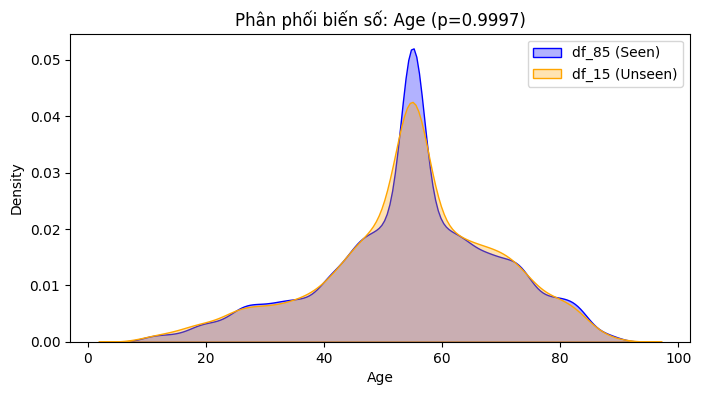

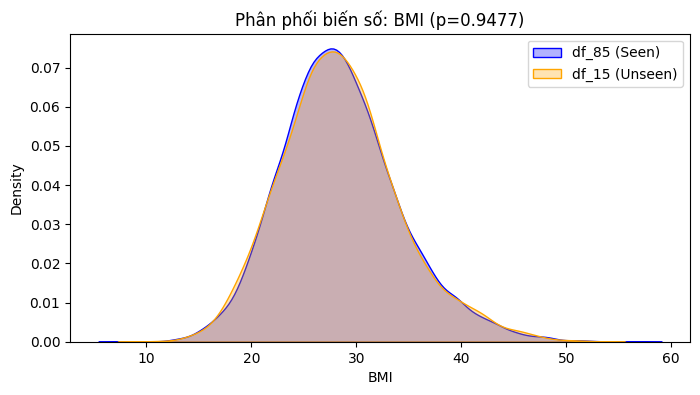

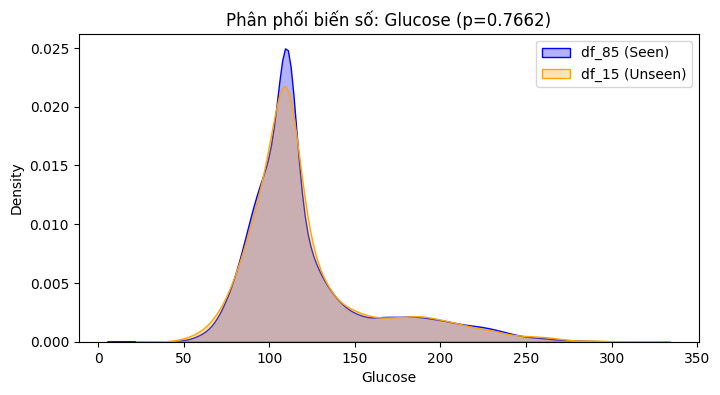

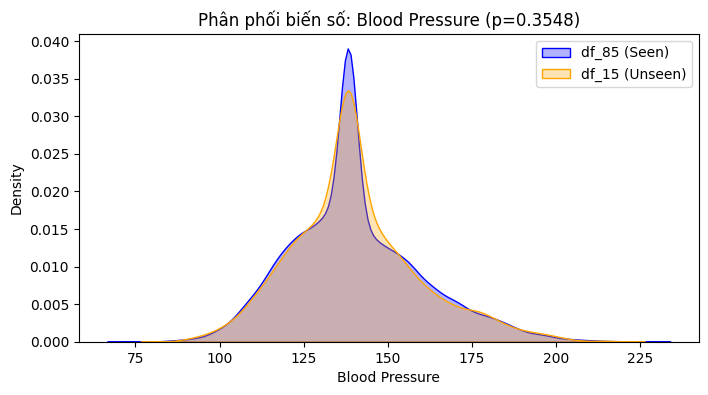

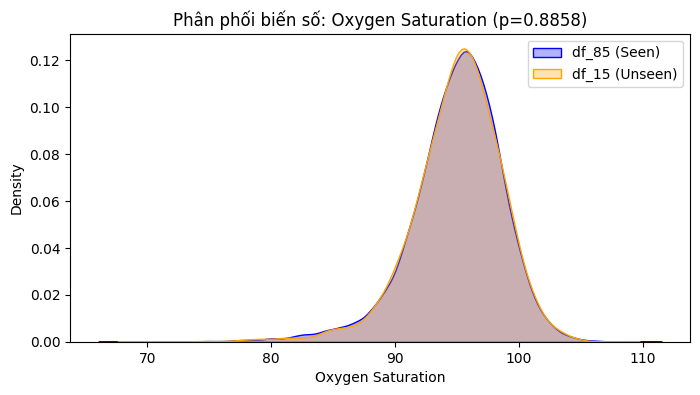

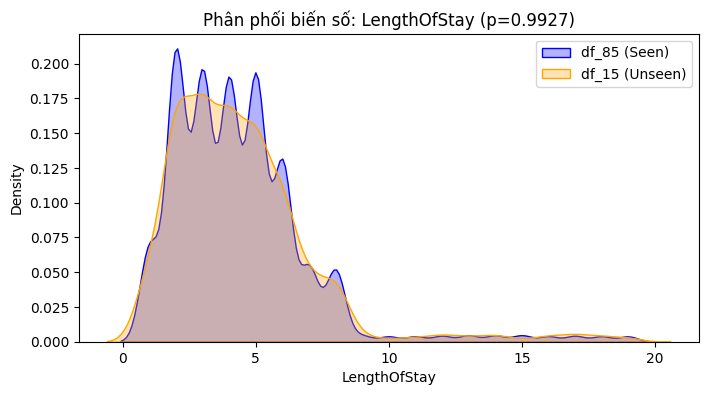

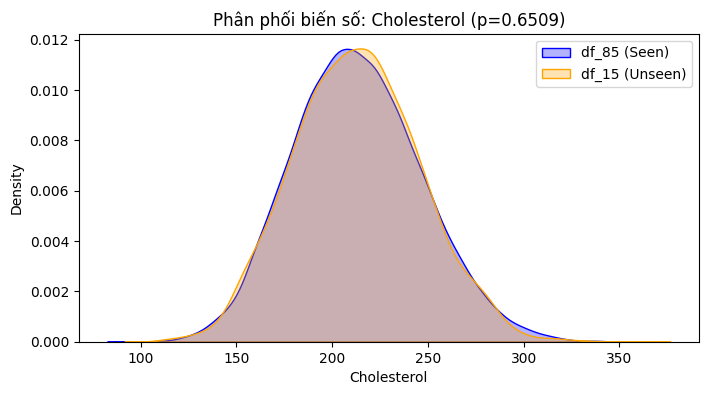

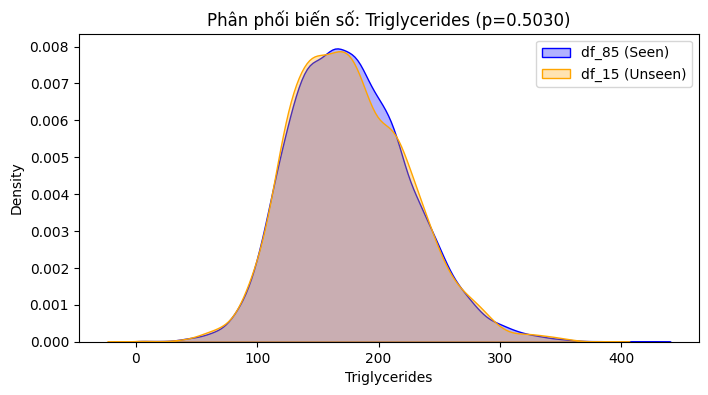

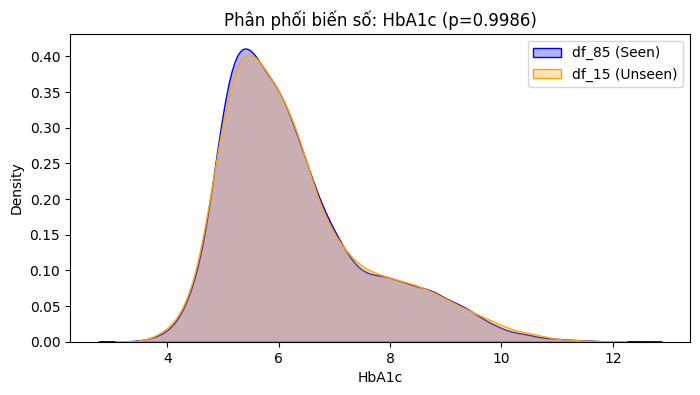

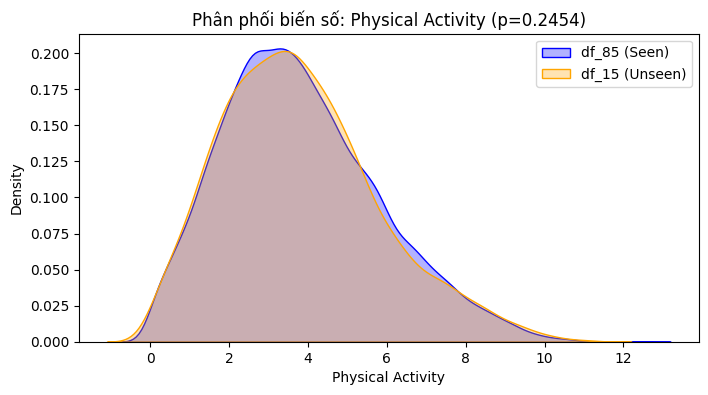

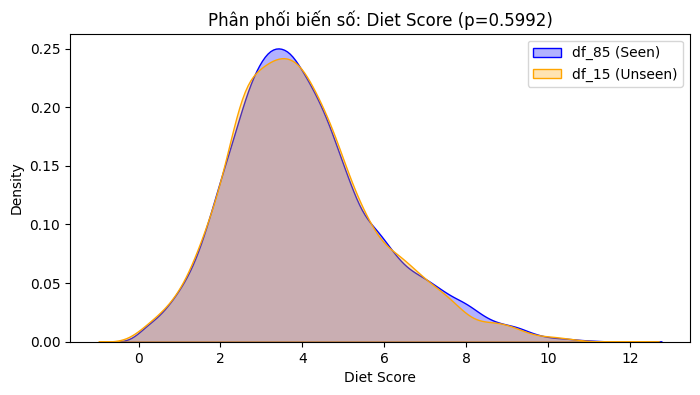

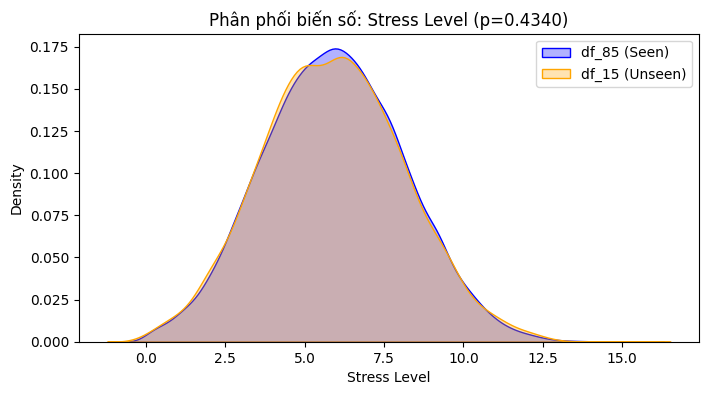

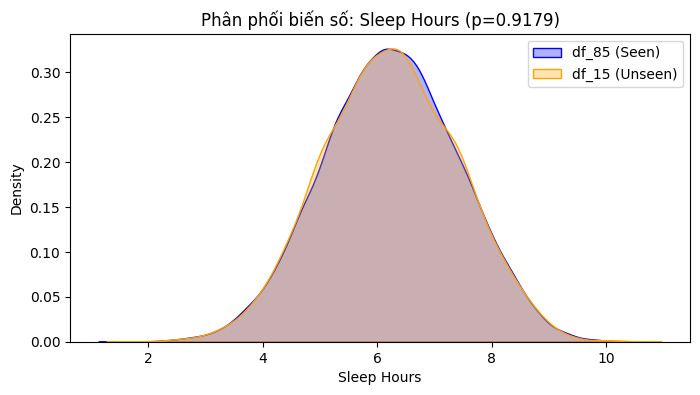

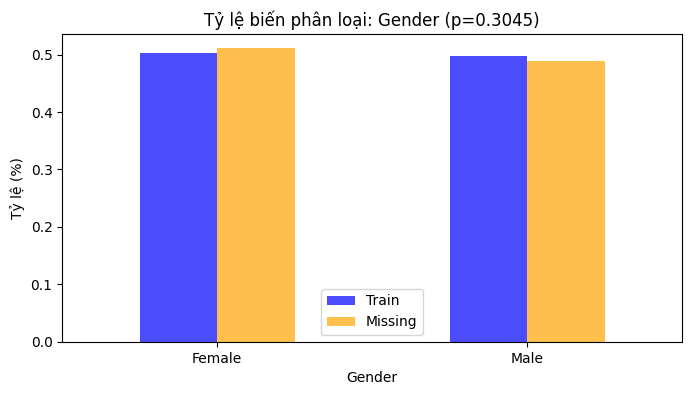

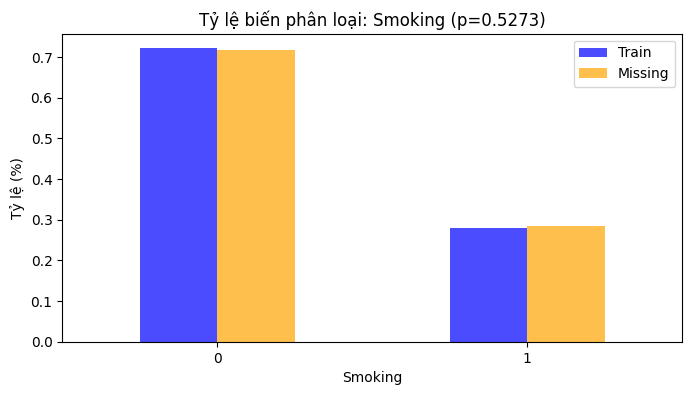

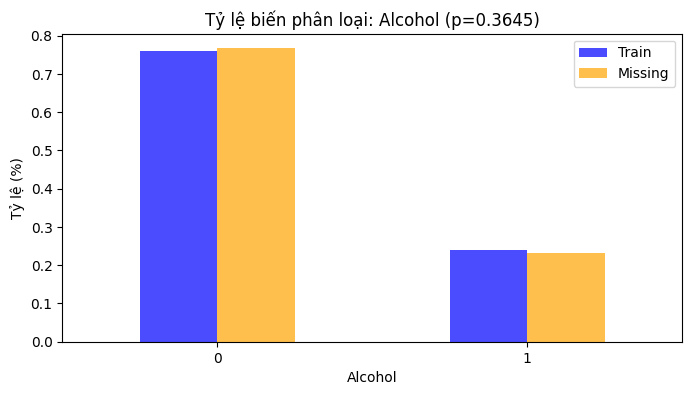

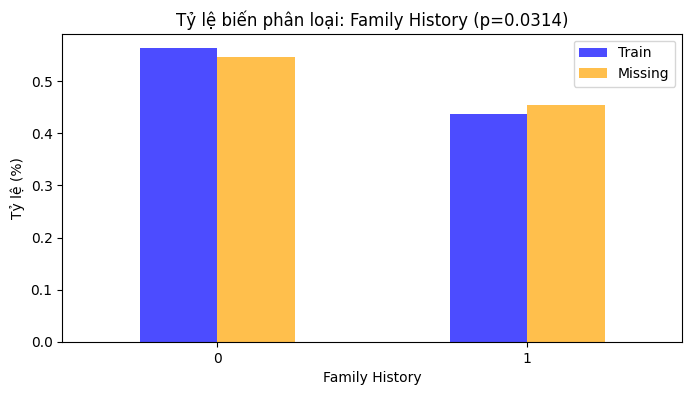


===== HOÀN TẤT KIỂM ĐỊNH =====



,Feature,Type,Test,P-Value,Conclusion (alpha=0.05)
0,Age,Numerical,KS Test,0.9997,Giống nhau
1,BMI,Numerical,KS Test,0.9477,Giống nhau
2,Glucose,Numerical,KS Test,0.7662,Giống nhau
3,Blood Pressure,Numerical,KS Test,0.3548,Giống nhau
4,Oxygen Saturation,Numerical,KS Test,0.8858,Giống nhau
5,LengthOfStay,Numerical,KS Test,0.9927,Giống nhau
6,Cholesterol,Numerical,KS Test,0.6509,Giống nhau
7,Triglycerides,Numerical,KS Test,0.5030,Giống nhau
8,HbA1c,Numerical,KS Test,0.9986,Giống nhau
9,Physical Activity,Numerical,KS Test,0.2454,Giống nhau


In [ ]:
categorical_cols = ['Gender', 'Smoking', 'Alcohol', 'Family History']
numeric_cols = ['Age', 'BMI', 'Glucose', 'Blood Pressure', 'Oxygen Saturation', 'LengthOfStay',
                'Cholesterol', 'Triglycerides', 'HbA1c', 'Physical Activity', 'Diet Score', 'Stress Level', 'Sleep Hours']
distribution_comparison.compare_distributions(numeric_cols, categorical_cols)

Như vậy, từ quá trình kiểm định phân phối cho thấy dữ liệu không có sự khác biệt đáng kể ở hai nhóm (ngoại trừ Family History, nhưng p-value không quá thấp và vẫn có thể bác bỏ nếu mức ý nghĩa = 0.01), củng cố lập luận rằng dữ liệu trống ngẫu nhiên (MCAR) và có thể tách các dòng có giá trị trống ở Medical Condition thành tập dữ liệu mô phỏng




## Chuẩn hóa dữ liệu (Scaling)

In [10]:
'''
Chuẩn hóa (Standard/Min-Max Scaling): đối với các đặc trưng dữ liệu số có phân phối xấp xỉ phân phối chuẩn sẽ thực hiện Standard Scaling,
còn các đặc trưng dữ liệu số không xấp xỉ phân phối chuẩn sẽ sử dụng Min-Max Scaling.'''

standard_cols = [
    "BMI",
    "Oxygen Saturation",
    "Cholesterol",
    "Triglycerides",
    "Sleep Hours",
    "Stress Level"
]
minmax_cols = [
    "Glucose",
    "Blood Pressure",
    "LengthOfStay",
    "HbA1c",
    "Physical Activity",
    "Diet Score",
    "Age"
]

# Chỉ giữ lại các cột thực sự tồn tại và là số
num_cols = pre_na.df.select_dtypes(include="number").columns.tolist()
standard_cols = [c for c in standard_cols if c in num_cols]
minmax_cols = [c for c in minmax_cols if c in num_cols and c not in standard_cols]

# Standard Scaling cho nhóm xấp xỉ phân phối chuẩn
prepro.scale(columns=standard_cols, method="standard")

# MinMax Scaling cho nhóm còn lại
prepro.scale(columns=minmax_cols, method="minmax")

Đã chuẩn hoá dữ liệu số ở cột ['BMI', 'Oxygen Saturation', 'Cholesterol', 'Triglycerides', 'Sleep Hours', 'Stress Level'] theo phương pháp standard
Đã chuẩn hoá dữ liệu số ở cột ['Glucose', 'Blood Pressure', 'LengthOfStay', 'HbA1c', 'Physical Activity', 'Diet Score', 'Age'] theo phương pháp minmax


DataPreprocessor(shape=(30000, 18))

In [11]:
prepro.df.head()

,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours
0,0.455696,Male,Diabetes,0.391428,0.401144,0.073986,0.290409,0.277778,0.562248,0.690939,0.476872,0,0,0.016116,0.293532,0,-0.383305,-0.151421
1,0.151899,Male,Healthy,0.171904,0.256540,-0.381614,0.691893,0.055556,-1.416021,-0.971850,0.179515,0,0,0.654311,0.489221,0,-0.022572,1.254717
2,0.506329,Female,Asthma,0.251249,0.421191,-1.037957,-1.243260,0.055556,0.056866,-0.235428,0.255507,0,0,0.403707,0.385572,1,-1.276121,-1.187081
3,0.594937,Female,Obesity,0.302425,0.369988,1.744520,0.440296,0.222222,-0.457168,0.108400,0.400881,0,0,0.254633,0.279436,0,-1.312194,-0.757661
4,0.708861,Female,Hypertension,0.250947,0.683121,0.461508,-0.014719,0.166667,1.387149,-1.249699,0.297357,0,1,0.286865,0.281924,0,0.207396,0.345358


In [12]:
# Tách file cho phân tích
df_missing, df_clean = prepro.split_by_na("Medical Condition")

prepro_na_scaled = DataPreprocessor(df_missing)
prepro_not_na_scaled = DataPreprocessor(df_clean)

prepro_na_scaled.save("medical_condition_na.csv", save_index=True)
prepro_not_na_scaled.save("medical_condition_not_na.csv", save_index=True)

Đã tách dữ liệu thành 2 DF na và not na theo cột Medical Condition


## Mã hóa đặc trưng phân loại

In [13]:
# Mã hóa đặc trưng phân loại: cần phải Label Encoding với Medical Condition do chọn làm biến mục tiêu.
prepro_not_na_scaled.label_encode(["Medical Condition"])

# Vì Gender chỉ có 2 giá trị (Male/Female), dùng label_encode sẽ tự động cho ra nhị phân 0/1
prepro_not_na_scaled.label_encode(["Gender"])

Đã mã hoá biến phân loại ['Medical Condition'] bằng LabelEncoder
Đã mã hoá biến phân loại ['Gender'] bằng LabelEncoder


DataPreprocessor(shape=(25500, 18))

# PHẦN III: HUẤN LUYỆN VÀ ĐÁNH GIÁ MÔ HÌNH

In [ ]:
# Thiết lập Logging (Ghi log ra file training_process.log)
setup_logging(log_file='training_process.log')
print("Đã thiết lập logging. Kiểm tra file 'training_process.log' để xem chi tiết quá trình.")

2025-12-09 08:21:07,645 - INFO - --- Đã thiết lập Logging: training_process.log ---
Đã thiết lập logging. Kiểm tra file 'training_process.log' để xem chi tiết quá trình.


In [14]:
# Khởi tạo đối tượng huấn luyện
trainer = ModelTrainer(
    data = prepro_not_na_scaled.df,
    target_col = 'Medical Condition',
    random_state=42
)

# Tên file CSV để lưu bảng so sánh kết quả các phương pháp
history_file = 'model_comparison_results.csv'
print("--- Đã khởi tạo Trainer ---")

--- Đã khởi tạo Trainer ---


## Tham số mặc định

In [ ]:
# Chạy tất cả model với tham số mặc định
trainer.train_model(tuning_method = None)

# Đánh giá và ghi vào file lịch sử
trainer.save_results_to_history(tuning_method = 'Default', filename = history_file)

2025-12-09 08:21:07,682 - INFO - Đã chia dữ liệu: Train shape (20400, 17), Test shape (5100, 17)
2025-12-09 08:21:07,683 - INFO - --- Huấn luyện mặc định cho: RandomForest ---
2025-12-09 08:21:18,518 - INFO - Đã huấn luyện xong RandomForest với tham số mặc định.
2025-12-09 08:21:18,519 - INFO - --- Huấn luyện mặc định cho: LogisticRegression ---
2025-12-09 08:21:20,151 - INFO - Đã huấn luyện xong LogisticRegression với tham số mặc định.
2025-12-09 08:21:20,152 - INFO - --- Huấn luyện mặc định cho: SVM ---
2025-12-09 08:21:31,167 - INFO - Đã huấn luyện xong SVM với tham số mặc định.
2025-12-09 08:21:31,168 - INFO - --- Huấn luyện mặc định cho: XGBoost ---
2025-12-09 08:21:34,063 - INFO - Đã huấn luyện xong XGBoost với tham số mặc định.
2025-12-09 08:21:34,174 - INFO - Kết quả RandomForest -> Accuracy: 0.9176, F1: 0.9161
2025-12-09 08:21:34,185 - INFO - Kết quả LogisticRegression -> Accuracy: 0.9000, F1: 0.8985
2025-12-09 08:21:37,825 - INFO - Kết quả SVM -> Accuracy: 0.8878, F1: 0.8865


In [ ]:
df_default = trainer.evaluate_all()
df_default

2025-12-09 08:21:38,198 - INFO - Kết quả RandomForest -> Accuracy: 0.9176, F1: 0.9161
2025-12-09 08:21:38,225 - INFO - Kết quả LogisticRegression -> Accuracy: 0.9000, F1: 0.8985
2025-12-09 08:21:41,815 - INFO - Kết quả SVM -> Accuracy: 0.8878, F1: 0.8865
2025-12-09 08:21:41,912 - INFO - Kết quả XGBoost -> Accuracy: 0.9229, F1: 0.9224


,Model,Accuracy,F1-Score
3,XGBoost,0.922941,0.922416
0,RandomForest,0.917647,0.916072
1,LogisticRegression,0.900000,0.898531
2,SVM,0.887843,0.886484


## Optuna tối ưu tham số

In [ ]:
# Chạy tất cả model với tối ưu tham số bằng Optuna
trainer.train_model(tuning_method = 'optuna')

# Đánh giá và ghi tiếp vào file lịch sử
trainer.save_results_to_history(tuning_method = 'Optuna', filename = history_file)

2025-12-09 08:21:41,942 - INFO - --- Bắt đầu tối ưu tham số (Optuna) cho: RandomForest (n_trials=30) ---


[I 2025-12-09 08:21:41,947] A new study created in memory with name: no-name-f306c27c-07d0-4281-a4bc-f7c40758765f


2025-12-09 08:21:41,953 - INFO - [RandomForest] Trial 0: Đang chạy...
2025-12-09 08:22:02,017 - INFO - [RandomForest] Trial 0 hoàn tất -> Acc: 0.9106
2025-12-09 08:22:02,020 - INFO - [RandomForest] Trial 1: Đang chạy...
2025-12-09 08:22:11,720 - INFO - [RandomForest] Trial 1 hoàn tất -> Acc: 0.8993
2025-12-09 08:22:11,723 - INFO - [RandomForest] Trial 2: Đang chạy...
2025-12-09 08:22:35,173 - INFO - [RandomForest] Trial 2 hoàn tất -> Acc: 0.9080
2025-12-09 08:22:35,176 - INFO - [RandomForest] Trial 3: Đang chạy...
2025-12-09 08:23:06,405 - INFO - [RandomForest] Trial 3 hoàn tất -> Acc: 0.9105
2025-12-09 08:23:06,408 - INFO - [RandomForest] Trial 4: Đang chạy...
2025-12-09 08:23:22,623 - INFO - [RandomForest] Trial 4 hoàn tất -> Acc: 0.9137
2025-12-09 08:23:22,626 - INFO - [RandomForest] Trial 5: Đang chạy...
2025-12-09 08:23:44,173 - INFO - [RandomForest] Trial 5 hoàn tất -> Acc: 0.9003
2025-12-09 08:23:44,176 - INFO - [RandomForest] Trial 6: Đang chạy...
2025-12-09 08:24:03,610 - INFO

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2025-12-09 08:38:23,572 - INFO - [SVM] Trial 0 hoàn tất -> Acc: 0.8633
2025-12-09 08:38:23,574 - INFO - [SVM] Trial 1: Đang chạy...
2025-12-09 08:42:19,640 - INFO - [SVM] Trial 1 hoàn tất -> Acc: 0.5250
2025-12-09 08:42:19,642 - INFO - [SVM] Trial 2: Đang chạy...
2025-12-09 08:44:26,050 - INFO - [SVM] Trial 2 hoàn tất -> Acc: 0.6511
2025-12-09 08:44:26,052 - INFO - [SVM] Trial 3: Đang chạy...
2025-12-09 08:48:14,197 - INFO - [SVM] Trial 3 hoàn tất -> Acc: 0.5560
2025-12-09 08:48:14,200 - INFO - [SVM] Trial 4: Đang chạy...
2025-12-09 08:50:06,127 - INFO - [SVM] Trial 4 hoàn tất -> Acc: 0.8497
2025-12-09 08:50:06,129 - INFO - [SVM] Trial 5: Đang chạy...
2025-12-09 08:51:26,926 - INFO - [SVM] Trial 5 hoàn tất -> Acc: 0.8851
2025-12-09 08:51:26,928 - INFO - [SVM] Trial 6: Đang chạy...
2025-12-09 08:52:09,876 - INFO - [SVM] Trial 6 hoàn tất -> Acc: 0.8953
2025-12-09 08:52:09,879 - INFO - [SVM] Trial 7: Đang chạy...
2025-12-09 08:52:50,027 - INFO - [SVM] Trial 7 hoàn tất -> Acc: 0.9003
2025-

In [ ]:
df_optuna = trainer.evaluate_all()
print(df_optuna)

2025-12-09 09:20:39,319 - INFO - Kết quả RandomForest -> Accuracy: 0.9163, F1: 0.9146
2025-12-09 09:20:39,331 - INFO - Kết quả LogisticRegression -> Accuracy: 0.9033, F1: 0.9022
2025-12-09 09:20:40,094 - INFO - Kết quả SVM -> Accuracy: 0.9035, F1: 0.9025
2025-12-09 09:20:40,219 - INFO - Kết quả XGBoost -> Accuracy: 0.9306, F1: 0.9302
                Model  Accuracy  F1-Score
3             XGBoost  0.930588  0.930213
0        RandomForest  0.916275  0.914559
2                 SVM  0.903529  0.902478
1  LogisticRegression  0.903333  0.902216


## Lưu kết quả đánh giá mô hình

In [ ]:
import os
import pandas as pd

#  Tổng hợp kết quả và lưu model
if os.path.exists(history_file):
    history_df = pd.read_csv(history_file)
    display(history_df)
else:
    print("Chưa có file lịch sử.")

# Lưu model tốt nhất (Dựa trên accuracy hiện tại trong trainer)
trainer.save_best_model('best_model.pkl')
trainer.save_best_params('best_hyperparameters.json')

,Timestamp,Method,Model,Accuracy,F1-Score
0,2025-12-09 08:21:38,Default,XGBoost,0.922941,0.922416
1,2025-12-09 08:21:38,Default,RandomForest,0.917647,0.916072
2,2025-12-09 08:21:38,Default,LogisticRegression,0.900000,0.898531
3,2025-12-09 08:21:38,Default,SVM,0.887843,0.886484
4,2025-12-09 09:20:39,Optuna,XGBoost,0.930588,0.930213
5,2025-12-09 09:20:39,Optuna,RandomForest,0.916275,0.914559
6,2025-12-09 09:20:39,Optuna,SVM,0.903529,0.902478
7,2025-12-09 09:20:39,Optuna,LogisticRegression,0.903333,0.902216


2025-12-09 09:20:40,292 - INFO - Đã lưu mô hình tốt nhất (XGBoost) vào best_model.pkl
2025-12-09 09:20:40,294 - INFO - Đã lưu chi tiết tham số tối ưu vào file: best_hyperparameters.json


# PHẦN IV: PHÂN TÍCH KẾT QUẢ MÔ HÌNH TỐT NHẤT

Model tốt nhất được chọn để vẽ: XGBoost

--- Confusion Matrix: XGBoost ---


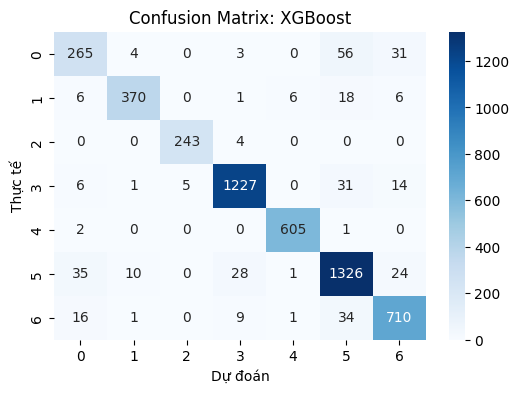

In [ ]:
# Lấy mô hình tốt nhất theo Accuracy
best_model_name = max(trainer.results, key=lambda k: trainer.results[k]['accuracy'])
print(f"Model tốt nhất được chọn để vẽ: {best_model_name}")

# Vẽ Confusion Matrix cho model tốt nhất này
print(f"\n--- Confusion Matrix: {best_model_name} ---")
trainer.plot_confusion_matrix(best_model_name)


--- Feature Importance: XGBoost ---


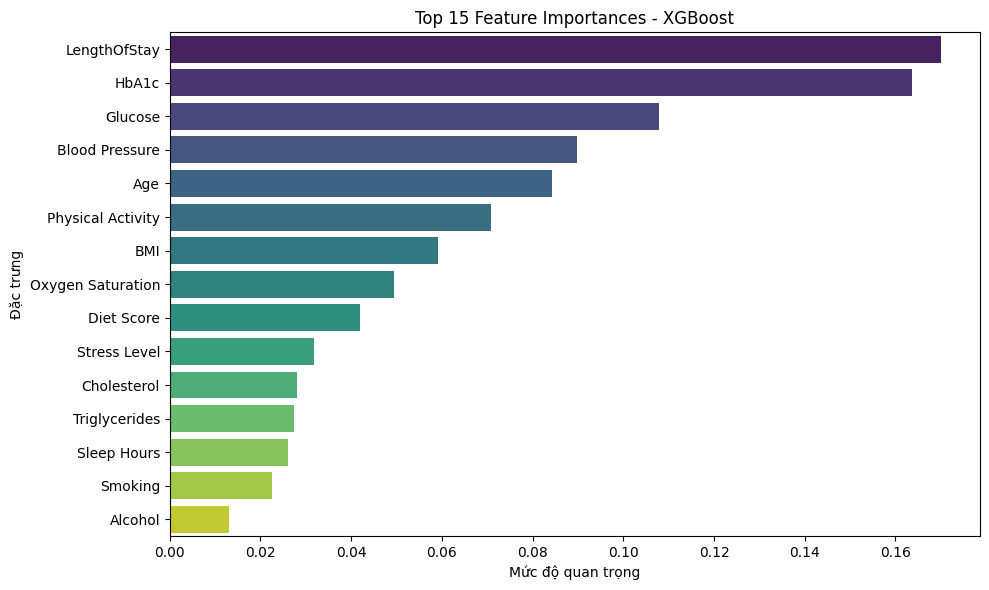

In [ ]:
# Vẽ feature importance (nếu có thể)
print(f"\n--- Feature Importance: {best_model_name} ---")
try:
    trainer.plot_feature_importance(best_model_name, top_n=15)
except Exception as e:
    print(f"Model {best_model_name} không hỗ trợ vẽ feature importance mặc định ({e})")

Đang phân tích lớp: 0


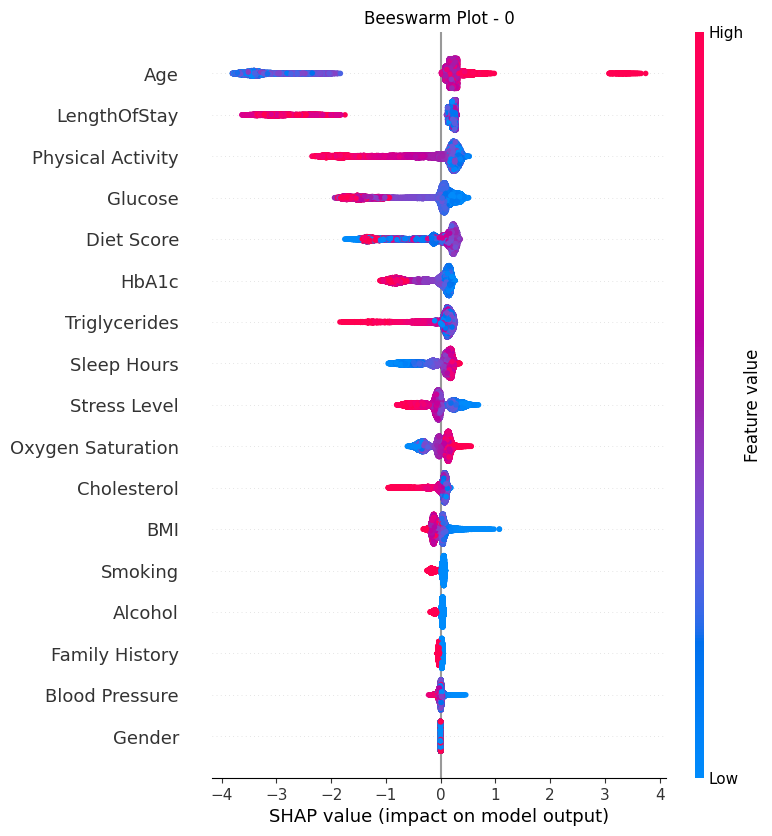

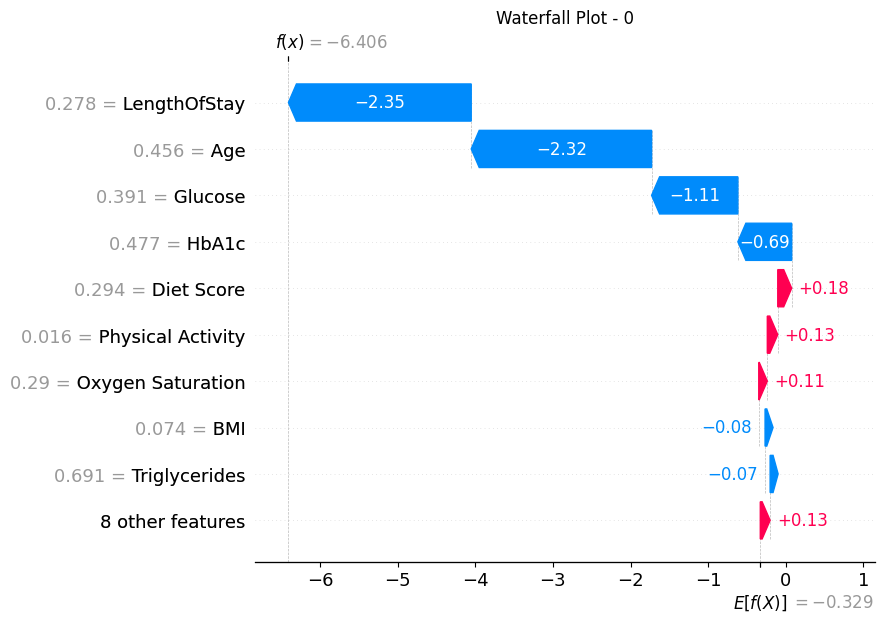

Đang phân tích lớp: 1


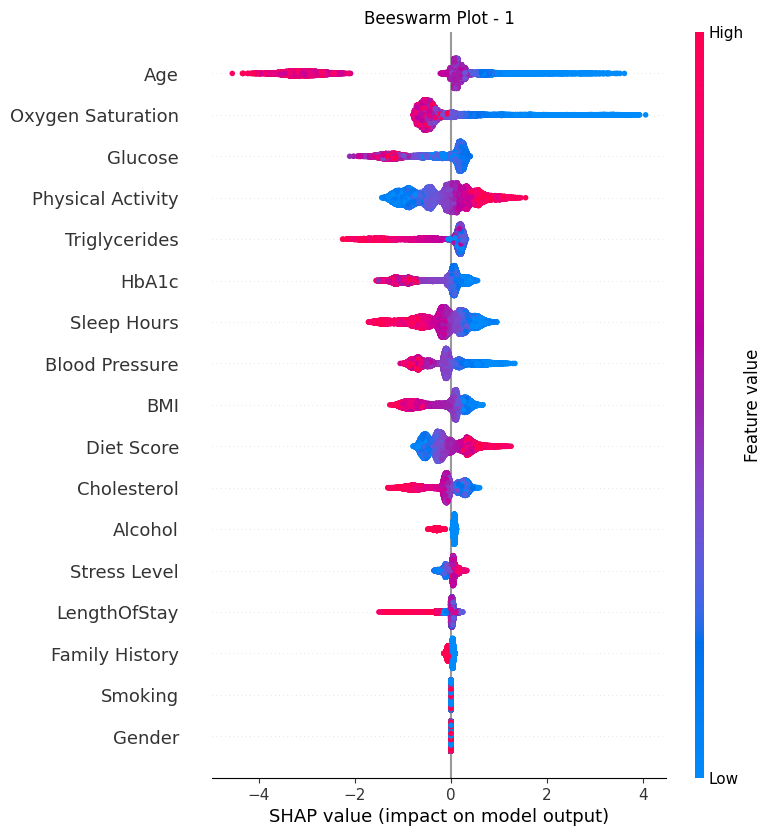

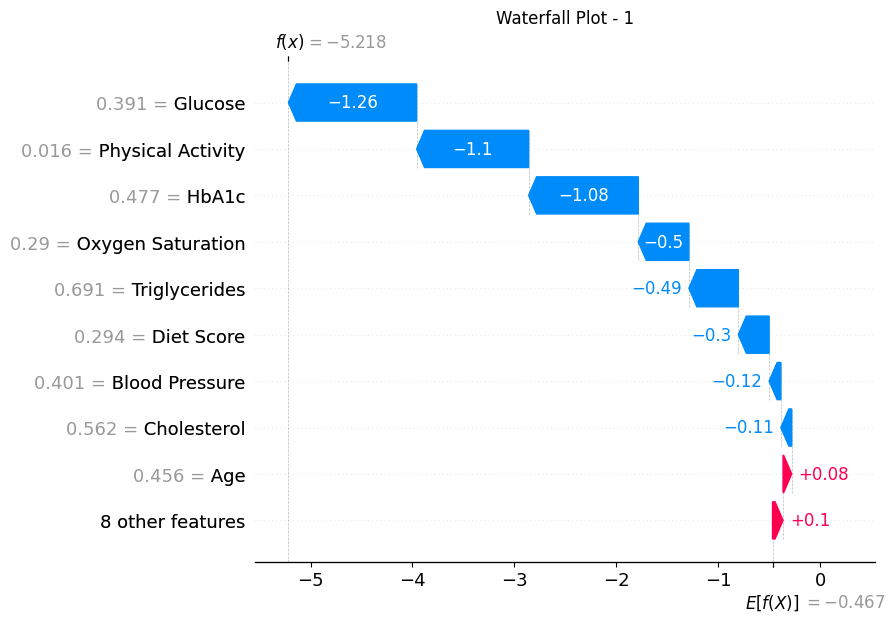

Đang phân tích lớp: 2


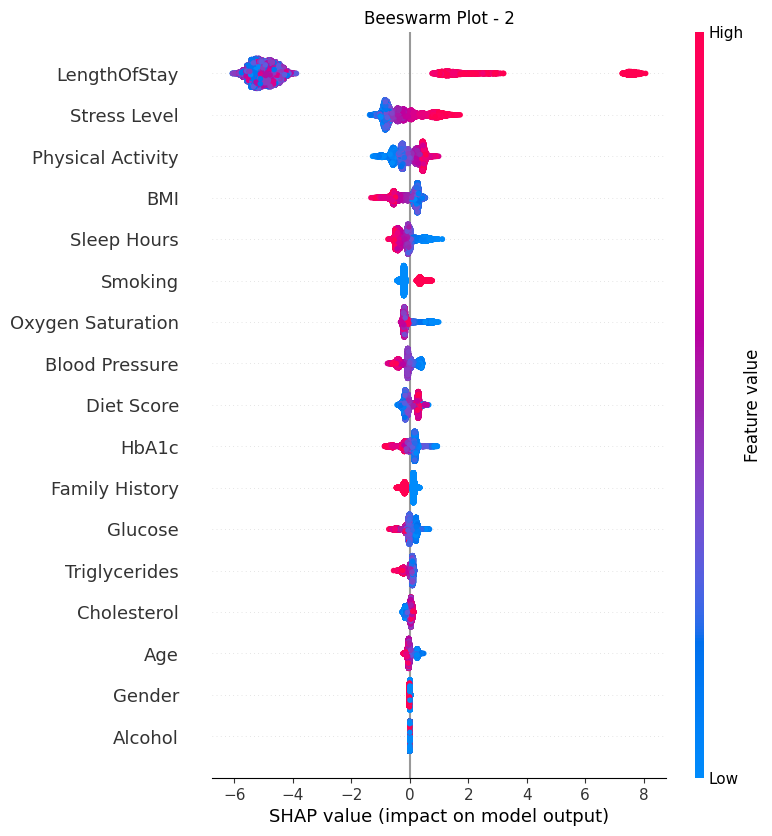

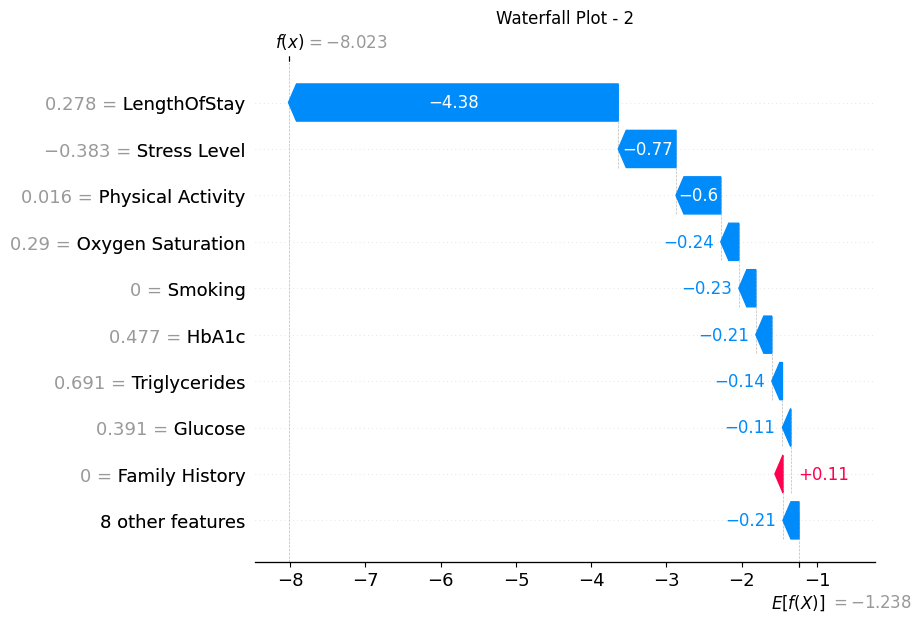

Đang phân tích lớp: 3


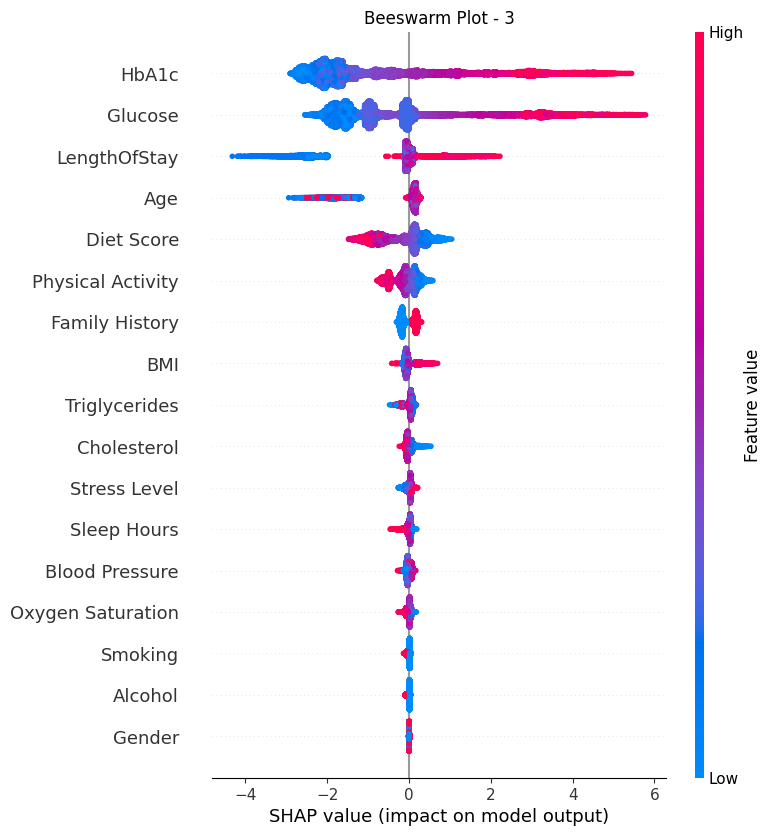

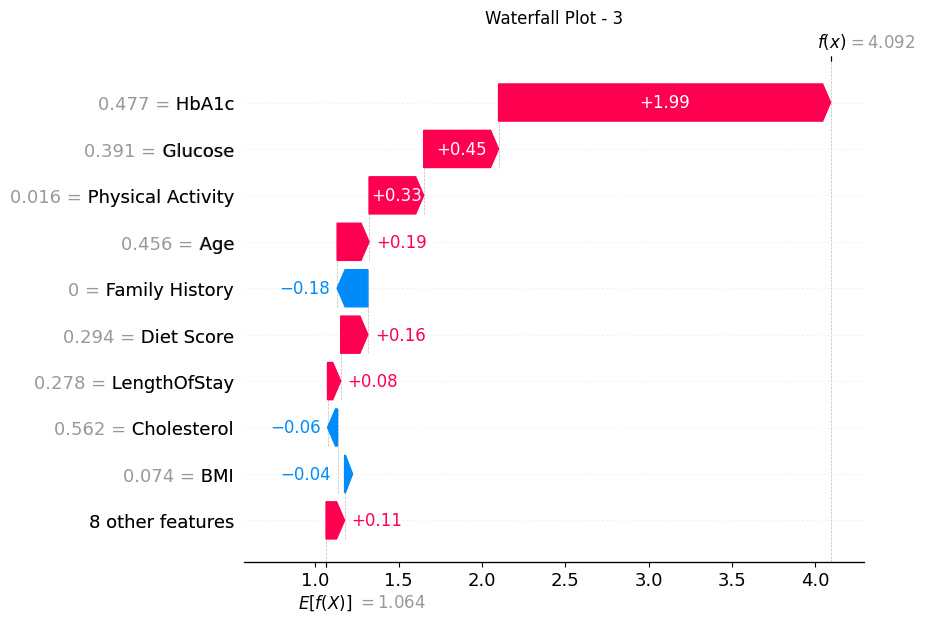

Đang phân tích lớp: 4


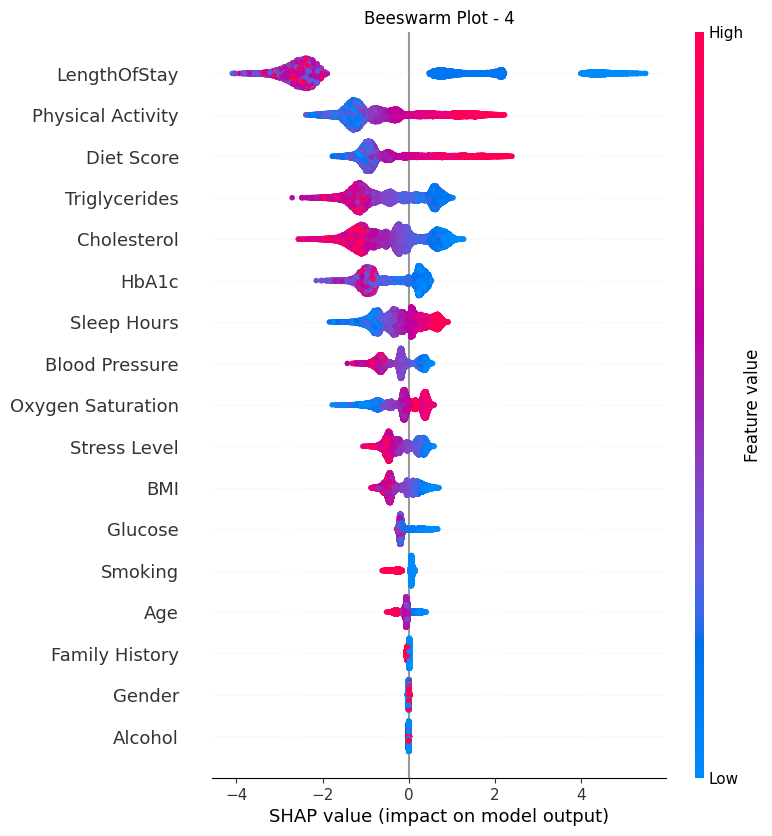

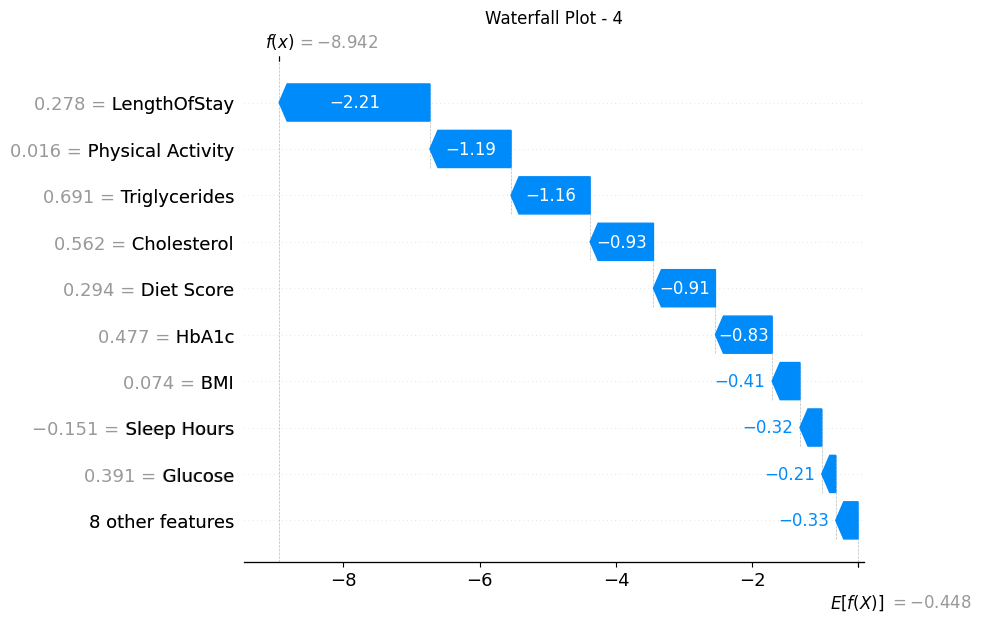

Đang phân tích lớp: 5


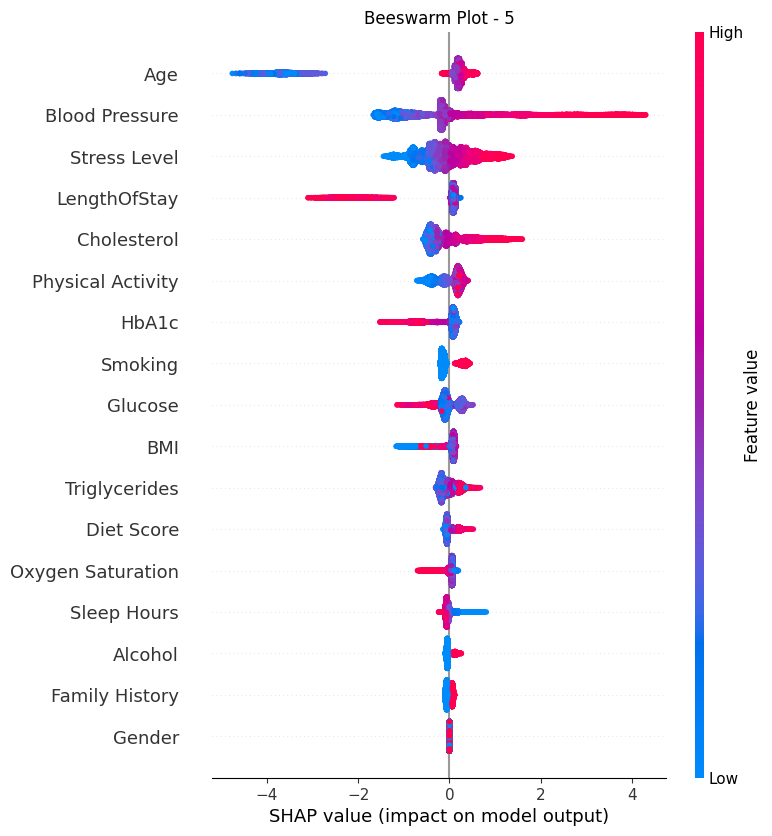

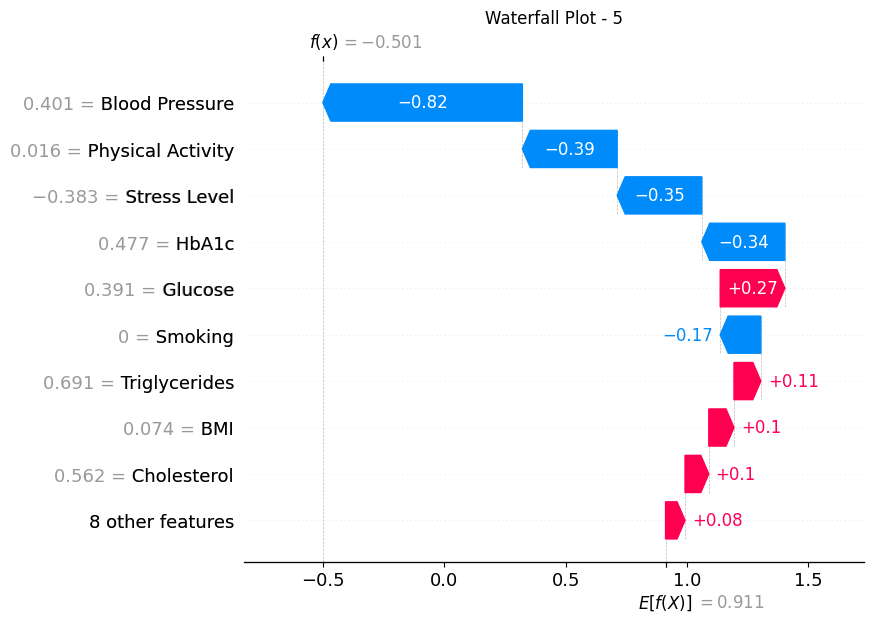

Đang phân tích lớp: 6


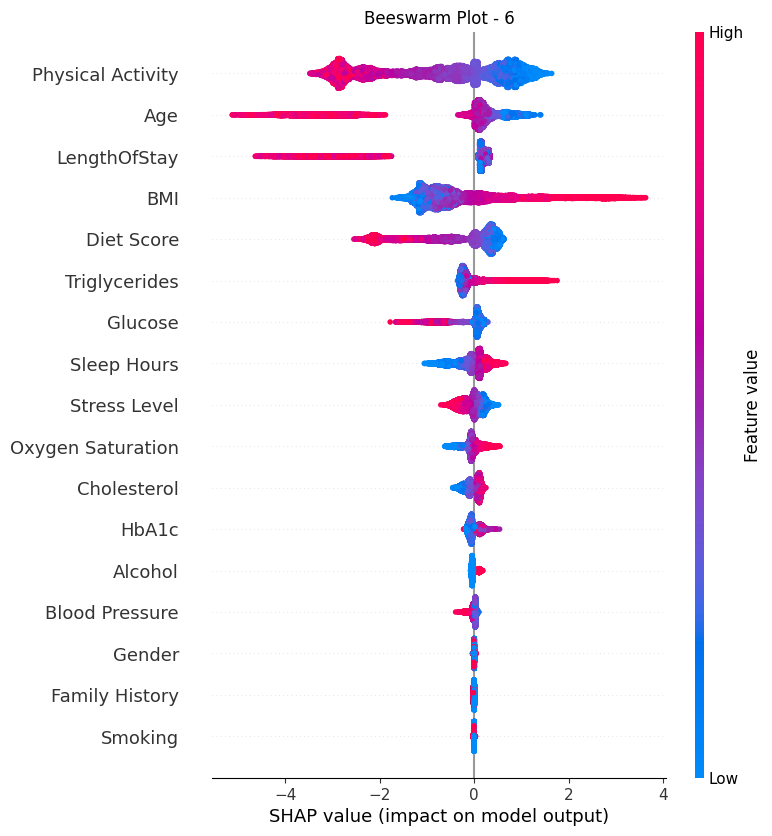

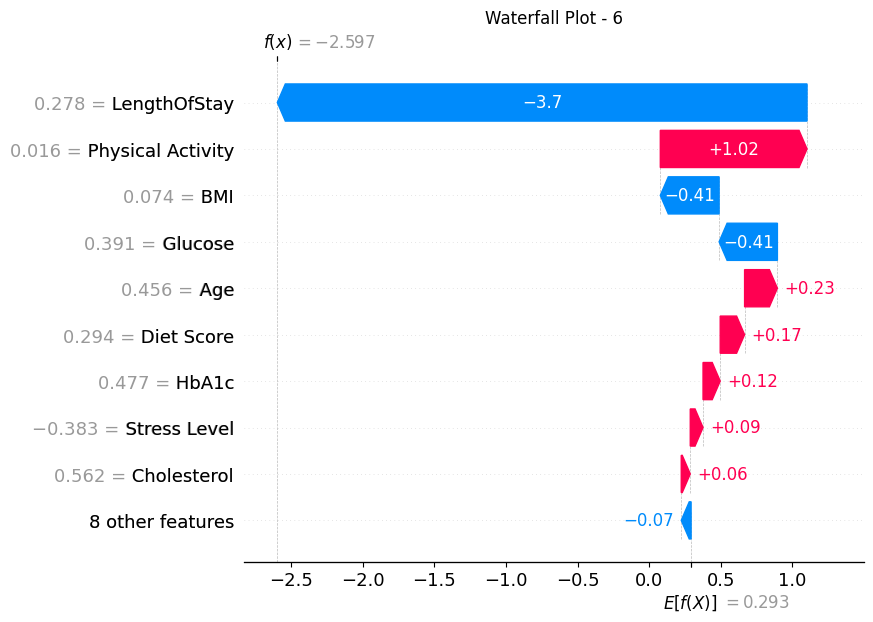

In [20]:
import shap
import joblib
import matplotlib.pyplot as plt
import numpy as np

model = joblib.load('best_model.pkl')
target_col = 'Medical Condition'
X_shap = prepro_not_na_scaled.df.drop(columns=[target_col])

if hasattr(model, 'feature_names_in_'):
    X_shap = X_shap[model.feature_names_in_]

try:
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_shap)
except:
    X_shap_sample = X_shap.iloc[:100]
    explainer = shap.KernelExplainer(model.predict_proba, X_shap_sample)
    shap_values = explainer.shap_values(X_shap_sample)
    X_shap = X_shap_sample

if hasattr(model, 'classes_'):
    class_names = model.classes_
elif isinstance(shap_values, list):
    class_names = range(len(shap_values))
else:
    class_names = range(shap_values.shape[-1])

for i, class_label in enumerate(class_names):
    print(f"Đang phân tích lớp: {class_label}")

    if isinstance(shap_values, list):
        shap_val_i = shap_values[i]
        base_val_i = explainer.expected_value[i] if hasattr(explainer.expected_value, '__iter__') else explainer.expected_value
    elif len(shap_values.shape) == 3:
        shap_val_i = shap_values[:, :, i]
        base_val_i = explainer.expected_value[i] if hasattr(explainer.expected_value, '__iter__') else explainer.expected_value
    else:
        shap_val_i = shap_values
        base_val_i = explainer.expected_value

    plt.figure()
    shap.summary_plot(shap_val_i, X_shap, show=False)
    plt.title(f"Beeswarm Plot - {class_label}")
    plt.show()

    plt.figure()
    explanation = shap.Explanation(
        values=shap_val_i[0],
        base_values=base_val_i,
        data=X_shap.iloc[0],
        feature_names=X_shap.columns
    )
    shap.plots.waterfall(explanation, show=False)
    plt.title(f"Waterfall Plot - {class_label}")
    plt.show()

In [23]:
# Phân giải mã hóa để phân tích kết quả
prepro_not_na_scaled.inverse_label_encode(['Medical Condition'], inplace=False)
df_temp = prepro_not_na_scaled.get_df()
mapping = df_temp[['Medical Condition', 'Medical Condition_original']].drop_duplicates().sort_values('Medical Condition')
for _, row in mapping.iterrows():
    print(f"{row['Medical Condition']}   {row['Medical Condition_original']}")

Đã biến đổi ngược cột ['Medical Condition'] từ LabelEncoder về dạng gốc
0   Arthritis
1   Asthma
2   Cancer
3   Diabetes
4   Healthy
5   Hypertension
6   Obesity


## Nhận xét và đánh giá kết quả
1. Đánh giá Hiệu suất Mô hình (Model Performance)

Kết quả so sánh thực nghiệm giữa 4 thuật toán phổ biến (XGBoost, Random Forest, SVM, Logistic Regression) trên tập dữ liệu y tế cho thấy sự vượt trội của các mô hình cây quyết định nâng cao (Ensemble Methods).

- XGBoost là mô hình tối ưu nhất:

  - Sau khi tối ưu hóa bằng Optuna, XGBoost đạt độ chính xác (Accuracy) cao nhất là 93.06% và F1-Score đạt 0.9302. Điều này cho thấy khả năng vượt trội của XGBoost trong việc nắm bắt các mối quan hệ phi tuyến tính phức tạp giữa các chỉ số sức khỏe (như Glucose, BMI, Age) và tình trạng bệnh.

  - So với Random Forest (91.63%), XGBoost có sự cải thiện khoảng 1.4%. Tuy nhiên, cả hai mô hình dựa trên cây (Tree-based) đều vượt xa các mô hình tuyến tính và vector hỗ trợ.

- Hiệu suất của các mô hình khác:

  - Random Forest: Đạt kết quả rất tốt (91.63%) và ổn định qua các lần thử nghiệm. Đây là một lựa chọn thay thế mạnh mẽ nếu cần một mô hình đơn giản hơn, ít tham số cần tinh chỉnh hơn XGBoost.

  - SVM và Logistic Regression: Cả hai đều dừng lại ở mức độ chính xác khoảng 90.3%. Việc Logistic Regression thấp hơn cho thấy dữ liệu có tính chất phi tuyến tính mạnh mà một đường ranh giới quyết định tuyến tính không thể phân tách hoàn hảo.

=> Kết luận: XGBoost được lựa chọn làm mô hình cuối cùng (best_model.pkl) để dự đoán nhãn cho tập dữ liệu thiếu (missing data) nhờ hiệu suất cao nhất và khả năng tổng quát hóa tốt.

2. Phân tích Tầm quan trọng của Đặc trưng (Feature Importance - SHAP)

Để tránh việc mô hình hoạt động như một "hộp đen", kỹ thuật SHAP (SHapley Additive exPlanations) đã được áp dụng để giải thích kết quả dự đoán. Các biểu đồ phân tích SHAP (Summary Plot và Waterfall Plot) cung cấp cái nhìn sâu sắc về cách từng đặc trưng ảnh hưởng đến quyết định của mô hình.

- Phân tích Biểu đồ Beeswarm (SHAP Summary Plot):

  - Biểu đồ này xếp hạng các đặc trưng dựa trên tầm quan trọng trung bình. Đối với bài toán phân loại bệnh, các đặc trưng như Age (Tuổi), BMI, Glucose, và Blood Pressure thường nằm ở top đầu, đóng vai trò quyết định lớn nhất.

  - Mối quan hệ giá trị: Màu sắc của các điểm (đỏ là giá trị cao, xanh là giá trị thấp) giúp ta nhận diện quy luật. Ví dụ: Với lớp bệnh "Diabetes" (Tiểu đường), các điểm màu đỏ (giá trị Glucose cao) sẽ tập trung mạnh về phía dương của trục SHAP value, nghĩa là lượng đường huyết cao làm tăng mạnh xác suất dự báo bệnh tiểu đường. Tương tự, BMI cao thường kéo theo nguy cơ "Obesity" (Béo phì).

- Phân tích Biểu đồ Waterfall (Local Interpretability):

  - Đối với từng bệnh nhân cụ thể, biểu đồ Waterfall minh họa cách các chỉ số cộng gộp để đẩy xác suất dự đoán từ giá trị cơ sở (base value) lên giá trị dự báo cuối cùng. Điều này cực kỳ hữu ích trong y tế để giải thích lý do tại sao một bệnh nhân cụ thể lại được chẩn đoán mắc bệnh đó (ví dụ: "Bệnh nhân được dự đoán Cao huyết áp chủ yếu do chỉ số Blood Pressure là 178 và Tuổi là 66").

3. Đánh giá qua Ma trận Nhầm lẫn (Confusion Matrix)

- Việc trực quan hóa Confusion Matrix cho thấy mô hình XGBoost phân loại tốt đồng đều trên các lớp bệnh (Diabetes, Hypertension, Asthma, v.v.).

- Các lỗi phân loại thường xảy ra giữa các cặp bệnh có triệu chứng hoặc chỉ số sinh học tương đồng (ví dụ: sự nhầm lẫn nhẹ giữa người khỏe mạnh và người có chỉ số bệnh ở mức biên). Tuy nhiên, tỷ lệ chéo trên đường chéo chính là rất cao, khẳng định độ tin cậy của mô hình.

KẾT LUẬN CHUNG

Quy trình xây dựng mô hình từ tiền xử lý dữ liệu, xử lý nhiễu/missing, đến tối ưu hóa tham số bằng Optuna đã mang lại một mô hình XGBoost mạnh mẽ với độ chính xác ~93%. Việc kết hợp phân tích SHAP không chỉ xác nhận độ chính xác về mặt toán học mà còn đảm bảo tính hợp lý về mặt y khoa (các chỉ số quan trọng thực sự chi phối kết quả dự đoán), đáp ứng tốt yêu cầu của bài toán hỗ trợ chẩn đoán bệnh.

# PHẦN V: DỰ ĐOÁN KẾT QUẢ TRÊN TẬP DỮ LIỆU MỚI

In [ ]:
import numpy as np
import joblib

# Trích xuất model tốt nhất để dự đoán (lưu ý model này đã được refit trên toàn bộ tập huấn luyện và đánh giá)
best_model = trainer.models[best_model_name]

# Mã hóa biến phân loại
prepro_na_scaled.label_encode(["Gender"])
X_missing = prepro_na_scaled.drop_columns(columns=['Medical Condition'])

# Thực hiện dự đoán
print("Thực hiện dự đoán")
y_pred_encoded = best_model.predict(X_missing.df)

# Giải mã (Inverse Transform) từ số về chữ (Tên bệnh)
le_target = prepro_not_na_scaled.encoders.get(('Medical Condition', 'label'))
if le_target:
    y_pred_label = le_target.inverse_transform(y_pred_encoded.astype(int))
    print("Đã giải mã thành công tên bệnh.")
else:
    print("Cảnh báo: Không tìm thấy Encoder. Kết quả sẽ giữ dạng số.")
    y_pred_label = y_pred_encoded

# Gán kết quả vào DataFrame
df_filled = pre_na.get_df()
df_filled['Medical Condition'] = y_pred_label

# Lưu kết quả cuối cùng
output_filename = "final_predicted_data.csv"
df_filled.to_csv(output_filename, index=False)

print(f"\n--- HOÀN TẤT ---")
print(f"Đã điền khuyết cho {len(df_filled)} dòng.")
print(f"File kết quả đã lưu tại: {output_filename}")

Đã mã hoá biến phân loại ['Gender'] bằng LabelEncoder
Đã loại bỏ cột ['Medical Condition']
Thực hiện dự đoán
Đã giải mã thành công tên bệnh.

--- HOÀN TẤT ---
Đã điền khuyết cho 4500 dòng.
File kết quả đã lưu tại: final_predicted_data.csv


In [ ]:
df_original_labeled = pre_not_na.get_df()

# Gộp 2 bảng lại
df_full_final = pd.concat([df_original_labeled, df_filled], axis=0)

# Lưu file tổng
df_full_final.to_csv("full_dataset_completed.csv", index=False)
print(f"Đã tạo file tổng hợp {len(df_full_final)} dòng: full_dataset_completed.csv")

Đã tạo file tổng hợp 30000 dòng: full_dataset_completed.csv
